In [44]:
import os
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score,roc_curve
import seaborn as sns
#sns.set(style="darkgrid")
from keras.models import load_model
from sklearn.dummy import DummyClassifier

In [2]:
TIMESTEPS = 1000
MIN_FAULT_DURATION = 12

In [3]:
df = pd.read_excel("time_series_all.xlsx")

In [4]:
df

,Feeder,Measurand,0,1,2,3,4,5,6,7,...,14490,14491,14492,14493,14494,14495,14496,14497,14498,14499
0,0,KV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B-4 S.J. ENCL.,AMPs,59.279,59.279,59.279,59.279,55.2146,55.2146,55.2146,55.2146,...,40.7447,40.7447,40.7447,50.2752,50.2752,50.2752,50.2752,62.5414,62.5414,62.5414
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981392,-0.981392,-0.981392,-0.981995,-0.981995,-0.981995,-0.981995,...,-0.964221,-0.964221,-0.964221,-0.973871,-0.973871,-0.973871,-0.973871,-0.98305,-0.98305,-0.98305
3,PANKHA RD CKT-2,AMPs,84.2096,84.2096,84.2096,84.2096,71.1225,71.1225,71.1225,71.1225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PANKHA RD CKT-2,KV,68.7123,68.7123,68.7123,68.7123,68.7763,68.7763,68.7763,68.7763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PANKHA RD CKT-2,PF,-0.993832,-0.993832,-0.993832,-0.993832,-0.994503,-0.994503,-0.994503,-0.994503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IGNOU S/S -3(Feeder 1),AMPs,50.6842,50.6842,50.6842,50.6842,47.0453,47.0453,47.0453,47.0453,...,33.5321,33.5321,33.5321,38.4531,38.4531,38.4531,38.4531,47.1678,47.1678,47.1678
7,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996355,-0.996355,-0.996355,-0.996485,-0.996485,-0.996485,-0.996485,...,-0.997994,-0.997994,-0.997994,-0.998952,-0.998952,-0.998952,-0.998952,-0.998727,-0.998727,-0.998727
8,1-OKHLA (SPARE),AMPs,21.7221,21.7221,21.7221,21.7221,19.3694,19.3694,19.3694,19.3694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1-OKHLA (SPARE),KV,66.5628,66.5628,66.5628,66.5628,66.762,66.762,66.762,66.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna()

In [6]:
df = df.reset_index(drop=True)

In [7]:
for i in df.columns[2:]:
    if(df[df.iloc[:,i]=='External identity error'].shape[0] != 0):
        df = df[df.iloc[:,i]!='External identity error']

C:\Users\u_kan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Resolution decreased - 1 hr

In [8]:
l = list(range(1,14000,4))
l.insert(0,'Feeder')
l.insert(1,'Measurand')

In [9]:
dff = df[l]

In [10]:
dff

,Feeder,Measurand,1,5,9,13,17,21,25,29,...,13961,13965,13969,13973,13977,13981,13985,13989,13993,13997
0,0,KV,0,0,0,0,0,0,0,0,...,0,52.9618,52.9008,53.4501,52.8397,52.8092,54.2131,52.7482,54.5793,54.5793
1,B-4 S.J. ENCL.,AMPs,59.279,55.2146,53.5783,50.199,49.1715,51.5043,54.3287,53.1617,...,67.434,63.3062,57.609,54.844,52.5823,49.5275,48.9819,51.8573,56.636,57.4393
2,B-4 S.J. ENCL.,PF,-0.981392,-0.981995,-0.977454,-0.974945,-0.973284,-0.968893,-0.968026,-0.970689,...,-0.986562,-0.984885,-0.980423,-0.979735,-0.969004,-0.970104,-0.970679,-0.950082,-0.956177,-0.95474
3,IGNOU S/S -3(Feeder 1),AMPs,50.6842,47.0453,45.3992,44.8068,44.1599,42.8744,41.7501,44.4888,...,41.8592,40.0655,44.042,45.2999,38.1166,35.8424,32.9916,34.2306,34.2306,35.8432
4,IGNOU S/S -3(Feeder 1),PF,-0.996355,-0.996485,-0.99766,-0.997741,-0.99738,-0.998821,-0.998663,-0.995812,...,-0.997208,-0.995261,-0.996108,-0.995599,-0.996334,-0.996389,-0.997183,-0.994392,-0.993183,-0.993386
5,CKT 2 PAPPANKALAN,AMPs,111.635,97.6701,91.6659,88.9646,90.058,106.832,167.083,260.174,...,63.9543,73.4614,74.2103,68.9588,62.7749,59.115,54.413,54.0669,53.5102,57.0059
6,CKT 2 PAPPANKALAN,KV,70.1961,70.2288,70.6763,70.9992,71.241,70.5069,68.1071,67.2777,...,67.4672,66.9533,66.8659,67.0037,67.9309,68.2156,68.2339,68.326,68.4864,68.3384
7,CKT 2 PAPPANKALAN,PF,-0.993118,-0.990419,-0.989444,-0.987249,-0.988496,-0.992268,-0.997058,-0.994797,...,1,0.997582,0.9976,0.997402,0.997189,0.994949,0.995092,0.995932,0.996034,0.995947
8,CKT 2 MEHRAUILI I/C,AMPs,57.005,54.5396,48.8387,46.5635,45.646,45.6812,53.6347,55.7416,...,48.8769,47.1917,48.3515,54.6723,52.6404,50.4269,48.2861,51.367,51.4565,45.8522
9,CKT 2 MEHRAUILI I/C,PF,-0.988547,-0.986929,-0.989987,-0.986021,-0.984567,-0.987035,-0.972462,-0.967557,...,-0.973338,-0.977112,0.974557,0.988831,-0.973604,-0.977668,-0.976915,0.983609,-0.974026,-0.984179


In [11]:
dff.set_index(['Feeder', 'Measurand'])

1         5      \
Feeder                                   Measurand                       
0                                        KV                0         0   
B-4 S.J. ENCL.                           AMPs         59.279   55.2146   
                                         PF        -0.981392 -0.981995   
IGNOU S/S -3(Feeder 1)                   AMPs        50.6842   47.0453   
                                         PF        -0.996355 -0.996485   
CKT 2 PAPPANKALAN                        AMPs        111.635   97.6701   
                                         KV          70.1961   70.2288   
                                         PF        -0.993118 -0.990419   
CKT 2 MEHRAUILI I/C                      AMPs         57.005   54.5396   
                                         PF        -0.988547 -0.986929   
BHAIRON RD                               AMPs        33.5153   31.6728   
                                         PF         0.981325  0.981325   
Incomer 2 MEHRAULI CKT2                  AMPs              0         0   
                                         KV          67.1221   67.6275   
                                         PF               -1        -1   
Incomer  OKHLA CKT 4                     AMPs              0         0   
                                         KV          34.1449   34.2107   
                                         PF               -1        -1   
S/S-11 D-4 V.KUNJ                        AMPs        53.0218   48.6972   
                                         PF        -0.969788 -0.974108   
DMRC + CARRIAPPA MARG SAINIK FORM        AMPs        9.15866   8.50337   
                                         PF        -0.992352 -0.996645   
SUBHAS VIHAR-1                           AMPs        69.4177   69.4177   
                                         PF         0.987461  0.987461   
CAPBANK-4                                AMPs              0         0   
                                         KV          10.8282    10.928   
CPWD SS5A                                AMPs              0         0   
                                         PF               -1        -1   
PUNJABI BASTI                            AMPs        48.6398   48.6398   
                                         PF        -0.997177 -0.997177   
...                                                      ...       ...   
B-1/283 VISH GAD                         AMPs         32.807   34.4186   
                                         PF        -0.959744 -0.895139   
1616JANTA FLATS                          AMPs             59        59   
                                         PF                0         0   
T-OFF MATIYALA PANKH.                    AMPs        23.5459    19.391   
                                         KV          64.9818   64.9028   
VENKATSWARA HOSPITAL-1                   AMPs              0         0   
                                         PF                0         0   
PLOT 8 DC                                AMPs        9.39418   7.71328   
                                         PF               -1        -1   
SEC-1 S/S-1 PUSHP VHR                    AMPs        66.6777   63.1926   
                                         PF         0.969092  0.968378   
J.J KHANPUR                              AMPs        101.691   95.5379   
                                         PF        -0.960588 -0.959253   
LODHI ROAD I/C NO.2                      AMPs       0.239037  0.201137   
                                         KV          33.8022   33.9751   
                                         PF               -1        -1   
400KV MUNDKA CKT                         AMPs        235.961   207.841   
                                         KV          11.2356   11.1912   
                                         PF         0.988105        -1   
KHANPUR KATTAWALA                        AMPs        77.9044   72.7136   
                                         PF        -0.97335

In [23]:
feeders = []
for i in dff['Feeder'].unique():
    tdf = dff[df['Feeder']==i]
    measurands = [tdf[tdf['Measurand']=='AMPs'].values]
    if len(measurands[0])==0: continue
    feeder = []
    for m in measurands:
        if len(m) != 0:
            feeder.append(m[0][2:])
        else:
            feeder.append(-np.ones(3500))
                
    feeders.append(feeder)
feeders = np.array(feeders)

In [24]:
feeders.shape

(1329, 1, 3500)

In [25]:
def isSubArray(A, n, m, st):
    B = [0] * m
    ii = st
    j = 0
    while (ii < n and j < m): 
        if (A[ii] == B[j]): 
            ii += 1 
            j += 1 
            if (j == m): 
                return ii,True
        else: 
            ii = ii - j + 1 
            j = 0 
    return ii,False 

In [26]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][:TIMESTEPS]
    r = isSubArray(xx.tolist(), TIMESTEPS, MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))                      # i=index, r[0]='timestamp', r[1]=fault
l = pd.DataFrame(l)
l

,0,1
0,2,596
1,3,433
2,5,85
3,6,12
4,7,229
5,10,12
6,11,12
7,13,626
8,14,582
9,18,672


In [27]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
feeders = feeders[indices]
len(feeders)

797

# faults

In [28]:
l = []
for i in range(len(feeders)):
    xx = feeders[i][0][TIMESTEPS:]
    r = isSubArray(xx.tolist(), len(xx), MIN_FAULT_DURATION,0)
    if(r[1]):
        l.append((i, r[0]))
l = pd.DataFrame(l)

In [29]:
# l: 0=index, 1='timestamp', 2=fault
X_fault_indices = pd.DataFrame(zip(l[0], l[1], l[1].apply(
    lambda t: list(range(t-MIN_FAULT_DURATION, t+TIMESTEPS-MIN_FAULT_DURATION))))) # l[1] is already fault - TIMESTEPS
X_fault = []
for i in X_fault_indices.values:
    X_fault.append(feeders[i[0]][:,i[2]])
    
X_fault = np.array(X_fault)                 # 0 - df index for future use
#X_fault = pd.DataFrame(list(X_fault[1].values))

In [30]:
X_fault.shape #.reshape(X_fault.shape[0], X_fault.shape[1], X_fault.shape[2], 1)

(292, 1, 1000)

# no fault
selected randomly from !l

In [31]:
indices = list(range(len(feeders)))
for i in reversed(l[0]):
    indices.pop(i)
no_faults = feeders[indices]
no_faults.shape

(505, 1, 3500)

In [32]:
X_no_faults = []

for i in range(len(no_faults)):
    r = np.random.randint(feeders.shape[2] - TIMESTEPS)
    X_no_faults.append(no_faults[i][:, r:r+TIMESTEPS])
    
X_no_faults = np.array(X_no_faults)
X_no_faults.shape

(505, 1, 1000)

In [33]:
X = np.concatenate([X_no_faults, X_fault])
y = np.array([0]*len(X_no_faults) + [1]*len(X_fault))

In [34]:
X.shape, y.shape

((797, 1, 1000), (797,))

In [35]:
X = np.transpose(X, (0, 2, 1))

In [38]:
X = X.reshape(X.shape[0],X.shape[1])
X.shape

(797, 1000)

In [39]:
# Spliting into traing and testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
x_train.shape,x_test.shape

((637, 1000), (160, 1000))

In [41]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit( x_train,y_train )

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [50]:
def judge_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('Training Performance')
    print('-> Acc:', accuracy_score(y_train, model.predict(x_train)) )
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(x_train)[:, 1] ))
    print(classification_report(y_train,model.predict(x_train)))
    
    print('Testing Performance')
    print('-> Acc:', accuracy_score(y_train, model.predict(x_train)) )
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(x_test)[:, 1] ))
    print(classification_report(y_test,model.predict(x_test)))

    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

Dummy stratified
--------------------
Training Performance
-> Acc: 0.5274725274725275
-> AUC: 0.45409106361279905
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       404
           1       0.36      0.35      0.35       233

   micro avg       0.53      0.53      0.53       637
   macro avg       0.49      0.49      0.49       637
weighted avg       0.53      0.53      0.53       637

Testing Performance
-> Acc: 0.5353218210361067
-> AUC: 0.5364994126531297
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       101
           1       0.30      0.22      0.25        59

   micro avg       0.53      0.53      0.53       160
   macro avg       0.45      0.46      0.45       160
weighted avg       0.49      0.53      0.51       160




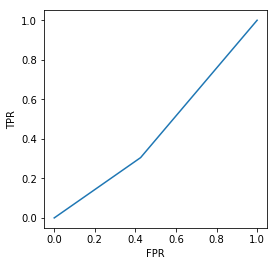

Dummy most_frequent
--------------------
Training Performance
-> Acc: 0.6342229199372057
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       404
           1       0.00      0.00      0.00       233

   micro avg       0.63      0.63      0.63       637
   macro avg       0.32      0.50      0.39       637
weighted avg       0.40      0.63      0.49       637

Testing Performance
-> Acc: 0.6342229199372057
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       101
           1       0.00      0.00      0.00        59

   micro avg       0.63      0.63      0.63       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.40      0.63      0.49       160




C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


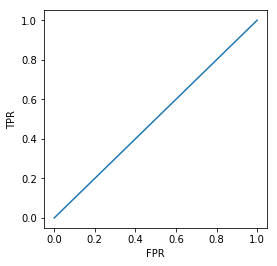

Dummy prior
--------------------
Training Performance
-> Acc: 0.6342229199372057
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       404
           1       0.00      0.00      0.00       233

   micro avg       0.63      0.63      0.63       637
   macro avg       0.32      0.50      0.39       637
weighted avg       0.40      0.63      0.49       637

Testing Performance
-> Acc: 0.6342229199372057
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       101
           1       0.00      0.00      0.00        59

   micro avg       0.63      0.63      0.63       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.40      0.63      0.49       160




C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\u_kan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


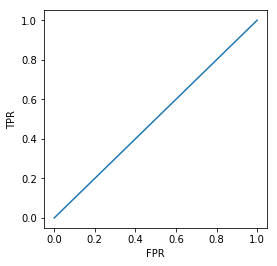

Dummy uniform
--------------------
Training Performance
-> Acc: 0.4662480376766091
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.63      0.51      0.57       404
           1       0.37      0.49      0.42       233

   micro avg       0.50      0.50      0.50       637
   macro avg       0.50      0.50      0.49       637
weighted avg       0.54      0.50      0.51       637

Testing Performance
-> Acc: 0.4897959183673469
-> AUC: 0.5
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       101
           1       0.40      0.58      0.47        59

   micro avg       0.52      0.52      0.52       160
   macro avg       0.53      0.53      0.51       160
weighted avg       0.56      0.52      0.53       160




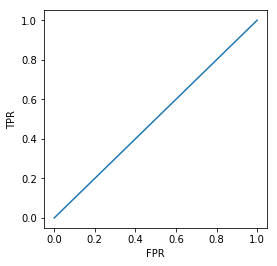

In [51]:
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(x_train, y_train)
    judge_model(dummy, 'Dummy {}'.format(strategy), plot=True)